In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("data_bersih.xlsx")
df.head()


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.488419,0.259897,-1.052274,-0.207485,-0.400617,-1.44472,-0.402655,0.896134,-0.603999,0.591013,...,-0.514314,0.199706,-0.492373,0.301774,0.214886,0.117868,0.211679,0.148642,-0.435491,-0.006838
1,0.657581,-1.116211,0.950323,0.325459,1.780959,1.00963,-1.066703,0.896134,0.514518,-1.537021,...,-0.514314,-1.240797,1.805019,-1.180154,1.557924,-0.864363,0.928132,1.595596,1.580105,1.246758
2,0.150093,0.030545,0.950323,0.192223,-0.400617,-1.44472,-0.402655,-0.572938,-0.603999,-0.473004,...,-0.514314,-0.520545,0.656323,0.301774,-0.456633,0.117868,0.211679,-0.574835,-0.435491,-0.006838
3,0.826744,-0.657509,0.950323,0.325459,1.053767,1.00963,-1.066703,0.161598,1.633035,-0.473004,...,-0.514314,-0.520545,1.805019,-1.180154,0.886405,-0.864363,0.928132,0.872119,1.580105,1.246758
4,0.826744,1.177302,-1.052274,-0.740429,-0.400617,1.00963,1.589490,-1.307475,0.514518,-0.473004,...,0.200011,0.919958,0.656323,-1.180154,-0.456633,-0.864363,1.644585,-2.021789,1.580105,-0.006838


In [ ]:
#Pisahkan Fitur dan Label
X = df.drop('stress_level', axis=1)
y = df['stress_level']

In [ ]:
#Normalisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
#Feature Construction

#Fitur gabungan mental Health
X_scaled['mental_risk_score'] = (
    X_scaled['anxiety_level'] +
    X_scaled['depression'] +
    X_scaled['self_esteem']*(-1)
)

#Fitur kondisi lingkungan
X_scaled['environment_score'] = (
    X_scaled['noise_level'] +
    X_scaled['living_conditions'] +
    X_scaled['safety']*(-1)
)

#Fitur tekanan akademik
X_scaled['academic_pressure'] = (
    X_scaled['study_load'] +
    X_scaled['academic_performance']*(-1)
)


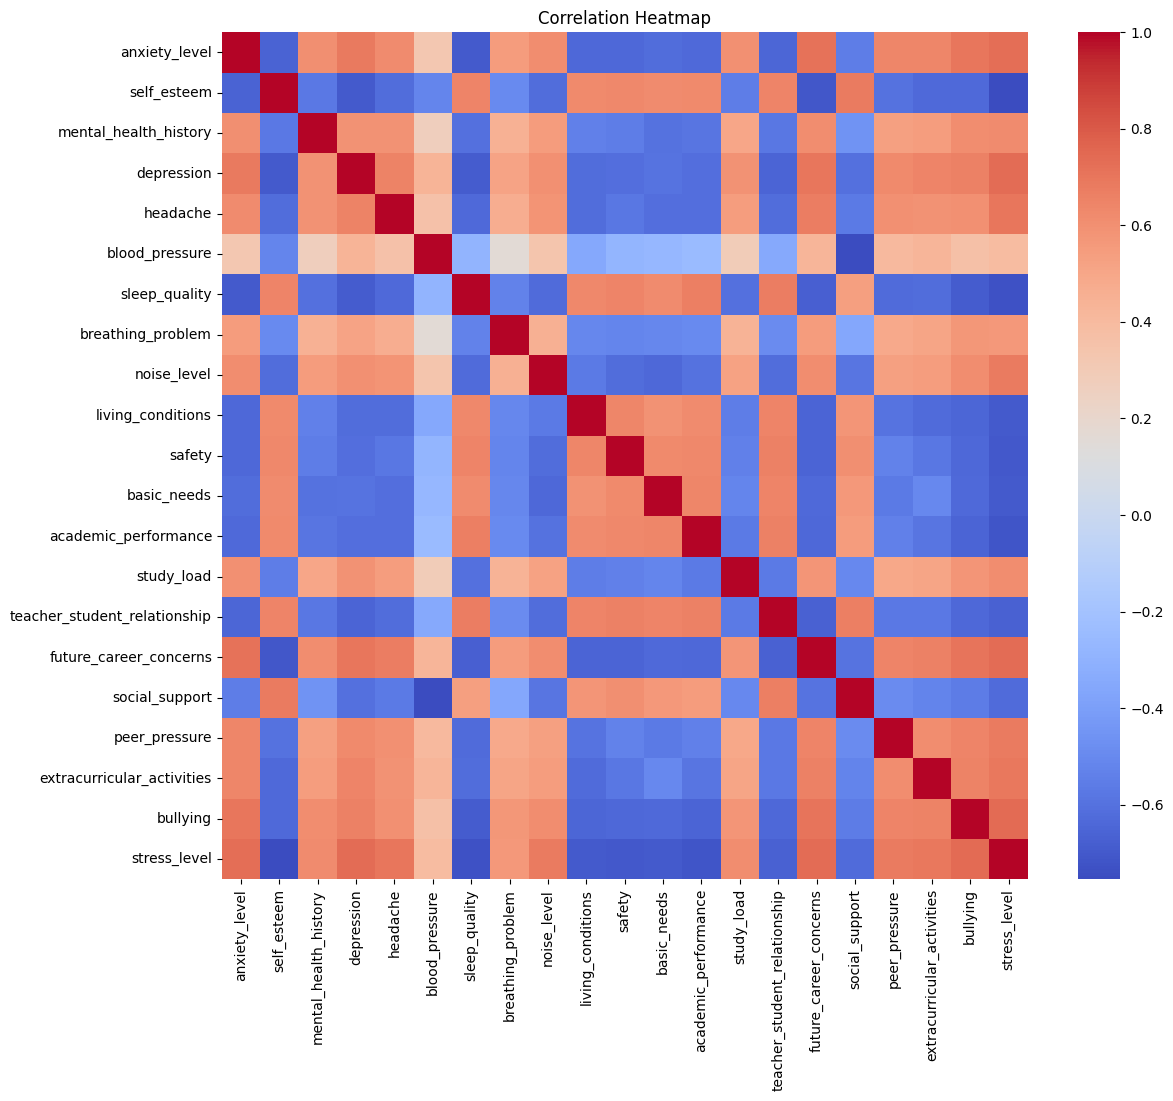

In [ ]:
#Korelasi Heatmap (untuk seleksi fitur)
plt.figure(figsize=(13,11))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_scaled, y)

selected_features = X_scaled.columns[selector.get_support()]
print("Fitur yang terpilih:")
print(selected_features)

Fitur yang terpilih:
Index(['self_esteem', 'depression', 'blood_pressure', 'sleep_quality',
       'safety', 'academic_performance', 'future_career_concerns', 'bullying',
       'mental_risk_score', 'academic_pressure'],
      dtype='object')


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['pca_1'] = pca_result[:,0]
df['pca_2'] = pca_result[:,1]

print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.66864904 0.05479218]


In [ ]:
final_df = X_scaled[selected_features].copy()
final_df['stress_level'] = y.values

final_df.to_csv("data_feature_engineering.csv", index=False)
print("Hasil FE disimpan sebagai data_feature_engineering.csv")

Hasil FE disimpan sebagai data_feature_engineering.csv
